<a href="https://colab.research.google.com/github/RohanKGP/Data-Science-Projects/blob/main/Data_Science_Project_Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 Small Dataset**
This Data is available as a CSV file, Downloaded from Kaggle.

We will analyze this data using the Pandas DataFrame. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt


In [ ]:

from google.colab import files
 
 
uploaded = files.upload()

Saving 4. covid_19_data.csv to 4. covid_19_data.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['4. covid_19_data.csv']))

In [ ]:
#counting the non-null values
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [ ]:
#Total null values
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

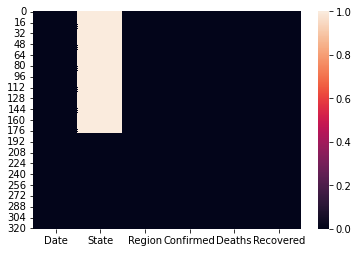

In [ ]:
#heatmap of null-values
sns.heatmap(data.isnull())
plt.show()

**Que 1**: *Show the number of Confirmed , Deaths and Recovered Cases in Each Region.*

In [ ]:
#glimpse of the dataset
data.head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [ ]:
data.groupby("Region").sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [ ]:
data.groupby("Region")['Confirmed','Recovered', 'Deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered,Deaths
Region,,,
Afghanistan,1939,252,60
Albania,766,455,30
Algeria,3848,1702,444
Andorra,743,423,42
Angola,27,7,2
...,...,...,...
West Bank and Gaza,344,71,2
Western Sahara,6,5,0
Yemen,6,1,0


**Que 2**: *Remove all the Records where Confirmed Case is less than 10* 

In [ ]:
data[~(data.Confirmed < 10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


**Que 3**: *In which Region the maximum number of Confirmed Case were Recorded*

In [ ]:
data.groupby("Region").Confirmed.sum().sort_values(ascending = False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

In [ ]:
#Top 10 Region which has maximum number of confirmed cases
data.groupby("Region").Confirmed.sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

**Que 4**: *In which Region Minimum Number of Deaths were recorded*

In [ ]:
data.groupby("Region").Deaths.sum().sort_values(ascending = True)

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

In [ ]:
#Top 50 Region where minimum number of Deaths were recorded
data.groupby("Region").Deaths.sum().sort_values(ascending = True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

**Que 5 (A)**: *How many Confirmed , Deaths and Recovered Cases Were Reported in India till 29th April 2020*

In [ ]:
data[data.Region == "India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


**Que 5 (B)**: *How many Confirmed , Deaths and Recovered Cases Were Reported in US till 29th April 2020*

In [ ]:
data[data.Region == "US"]

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


**Que 6**: *Sort the Entire data with respect to number of Confirmed Case in ascending order*

In [ ]:
data.sort_values(by = ["Confirmed"], ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


-- **Rohan Raju Meshram**

  *Department of Mining Engineering*

  *Indian Institute of Technology Kharagpur*. 
  